# Burgers Equation

[Burgers equation:](https://en.wikipedia.org/wiki/Burgers%27_equation)

$$
\frac{\partial \mathbf{u}}{\partial t}
=-\mathbf{u} \cdot \nabla \mathbf{u} + \nu \nabla^2 \mathbf{u}
$$

In [1]:
from torchfsm.operator import Operator, Convection, Laplacian

def Burgers(nu:float) -> Operator:
    return nu*Laplacian()-Convection()
burgers=Burgers(0.01)

In [2]:
import torch
from torchfsm.mesh import MeshGrid
from torchfsm.plot import plot_traj
from torchfsm.traj_recorder import AutoRecorder
device='cuda' if torch.cuda.is_available() else 'cpu'
L=1.0; N=128; 

## Solution in 1D

In [3]:
mesh=MeshGrid([(0,L,N)],device=device)
x=mesh.bc_mesh_grid()
u_0=torch.sin(2*torch.pi*x/L)+0.5
traj=burgers.integrate(
    u_0=u_0,
    mesh=mesh,
    dt=0.01,
    step=200,
    trajectory_recorder=AutoRecorder(),
)

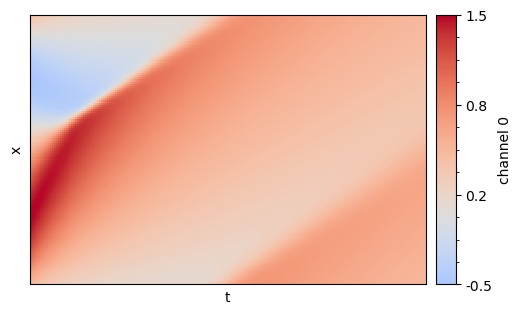

In [4]:
plot_traj(traj,animation=False)

We also randomly generate a batch of initial conditions and solve the Burgers equation in a batched manner:

In [17]:
from torchfsm.field import wave_1d
x=mesh.bc_mesh_grid(batch_size=3)
u_0=wave_1d(x,
            batched=True,
            min_k=2,max_k=3,
            min_amplitude=0.1,
            max_amplitude=0.5,
            mean_shift_coef=2)
traj=burgers.integrate(
    u_0=u_0,
    mesh=mesh,
    dt=0.005,
    step=200,
    trajectory_recorder=AutoRecorder(),
)

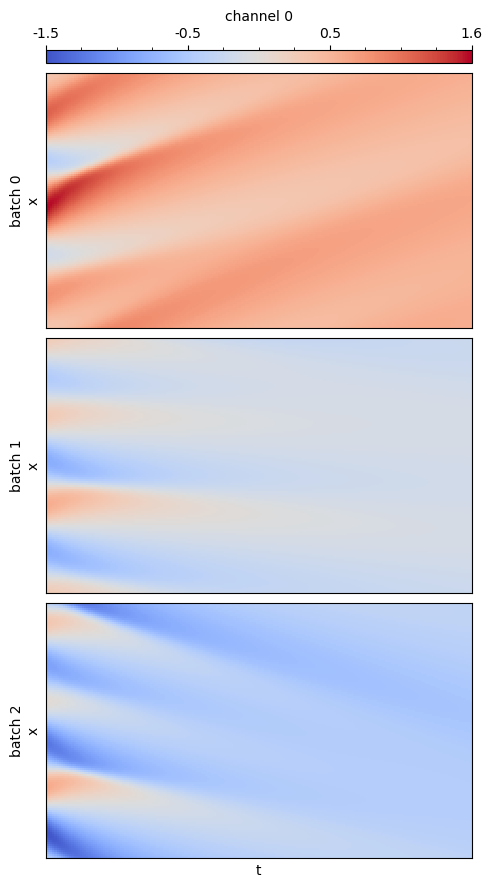

In [18]:
plot_traj(traj,animation=False)

## Solution in 2D

In [5]:
mesh=MeshGrid([(0,L,N),(0,L,N)],device=device)
x,y=mesh.bc_mesh_grid()
u_0=torch.cat([torch.sin(2*torch.pi*x/L)*torch.cos(4*torch.pi*y/L),
               torch.cos(2*torch.pi*x/L)*torch.sin(4*torch.pi*y/L)],
              dim=1)
traj=burgers.integrate(
    u_0=u_0,
    mesh=mesh,
    dt=0.01,
    step=50,
    trajectory_recorder=AutoRecorder(),
)

In [6]:
plot_traj(traj)

## Solution in 3D

In [7]:
mesh=MeshGrid([(0,L,N),(0,L,N),(0,L,N)],device=device)
x,y,z=mesh.bc_mesh_grid()
u_0=torch.cat([torch.sin(2*torch.pi*x/L)*torch.cos(4*torch.pi*y/L)*torch.sin(6*torch.pi*z/L),
               torch.cos(2*torch.pi*x/L)*torch.sin(4*torch.pi*y/L)*torch.cos(6*torch.pi*z/L),
               torch.sin(2*torch.pi*x/L)*torch.cos(4*torch.pi*y/L)*torch.sin(6*torch.pi*z/L)],
              dim=1)
traj=burgers.integrate(
    u_0=u_0,
    mesh=mesh,
    dt=0.01,
    step=50,
    trajectory_recorder=AutoRecorder(),
)

In [8]:
plot_traj(traj)